In [29]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import  MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [30]:
train_labels = []
train_samples = []

In [31]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)


    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)


    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [32]:
for i in train_samples:
    print(i)

50
80
17
79
16
80
28
80
35
84
38
96
32
81
54
84
17
81
58
70
61
71
24
89
40
70
41
69
32
90
19
94
16
96
25
72
62
71
27
90
62
85
29
73
52
77
19
65
28
89
39
99
44
89
31
87
49
73
32
77
14
100
44
92
54
95
45
66
60
68
21
93
44
82
35
67
60
96
52
97
19
96
19
90
26
78
22
92
37
96
63
100
48
67
40
77
61
98
63
99
55
86
48
77
33
70
22
87
49
83
56
92
14
80
49
71
14
94
22
82
22
71
53
84
64
70
54
98
28
95
45
83
53
78
36
97
61
84
50
83
17
81
44
80
46
100
27
65
18
91
22
98
15
75
57
100
20
96
37
100
44
66
34
83
47
73
49
97
16
84
55
73
46
66
47
86
23
100
55
71
49
78
57
66
37
69
55
85
52
69
21
98
43
90
26
68
19
77
59
99
20
72
64
92
31
90
41
98
49
96
33
93
64
96
25
96
53
100
56
95
36
89
18
88
35
65
45
65
50
98
36
71
25
92
18
89
35
81
18
82
42
82
60
65
22
86
64
71
15
80
42
92
25
97
35
66
29
90
56
88
50
83
20
85
53
84
48
76
21
67
50
80
55
80
51
96
21
74
38
95
24
70
50
82
45
74
60
75
50
83
28
98
33
86
26
87
13
96
52
92
14
78
63
83
42
84
60
76
22
66
40
77
57
77
50
70
53
96
27
83
38
93
18
95
49
76
47
91
23
86
30


In [33]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)



In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
print(scaled_train_samples)

[[0.95402299]
 [0.4137931 ]
 [0.79310345]
 ...
 [0.5862069 ]
 [0.8045977 ]
 [0.94252874]]


In [35]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax') # output units is basically 2 possible outputs
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1 ,batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6505 - accuracy: 0.5466 - val_loss: 0.6338 - val_accuracy: 0.6238 - 1s/epoch - 6ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6278 - accuracy: 0.6508 - val_loss: 0.6090 - val_accuracy: 0.7095 - 284ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6057 - accuracy: 0.6931 - val_loss: 0.5853 - val_accuracy: 0.7381 - 292ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5826 - accuracy: 0.7376 - val_loss: 0.5602 - val_accuracy: 0.7762 - 291ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5580 - accuracy: 0.7619 - val_loss: 0.5336 - val_accuracy: 0.8048 - 296ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5322 - accuracy: 0.7926 - val_loss: 0.5063 - val_accuracy: 0.8476 - 271ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5058 - accuracy: 0.8259 - val_loss: 0.4785 - val_accuracy: 0.8429 - 273ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4798 - accuracy: 0.8444 - val_loss: 0.4523 - val_accuracy: 0.8619 - 251ms/epoch - 1ms/step
Epo

In [39]:
test_labels = []
test_samples = []

for i in range(50):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)


    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)


    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [40]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [41]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predictions

In [42]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [43]:
for i in predictions:
    print(i) #first item in every list is the probability of someone experiencing side effects and the other one is
             # the chance he does 

[0.49490383 0.5050962 ]
[0.07551721 0.92448276]
[0.21089773 0.7891023 ]
[0.49490383 0.5050962 ]
[0.36817828 0.63182175]
[0.07551721 0.92448276]
[0.9602461  0.03975392]
[0.3385072 0.6614928]
[0.9469841  0.05301585]
[0.25736767 0.74263227]
[0.07551721 0.92448276]
[0.3385072 0.6614928]
[0.8867769  0.11322305]
[0.03668761 0.9633124 ]
[0.03431326 0.96568674]
[0.6222876  0.37771246]
[0.03431326 0.96568674]
[0.06638376 0.9336162 ]
[0.91629106 0.08370895]
[0.39888173 0.60111827]
[0.05459242 0.94540757]
[0.15325932 0.84674066]
[0.03208743 0.9679126 ]
[0.43040168 0.5695983 ]
[0.05828533 0.9417147 ]
[0.823258   0.17674199]
[0.9469841  0.05301585]
[0.9469841  0.05301585]
[0.04191875 0.95808125]
[0.04191875 0.95808125]
[0.95979494 0.04020502]
[0.19008842 0.80991155]
[0.12251544 0.8774845 ]
[0.02804725 0.97195274]
[0.05112076 0.94887924]
[0.5595761 0.4404239]
[0.39888173 0.60111827]
[0.9469841  0.05301585]
[0.25736767 0.74263227]
[0.9603954  0.03960462]
[0.6222876  0.37771246]
[0.5595761 0.4404239]


In [44]:
rounded_preds = np.argmax(predictions, axis=-1)

In [ ]:
for i in rounded_preds:
    print(i)

# Confusion Matrix

In [46]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [48]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_preds)

In [60]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized conf mat")
    else:
        print("Conf mat, without normalization")

    print(cm)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    

Conf mat, without normalization
[[ 961   89]
 [  49 1001]]


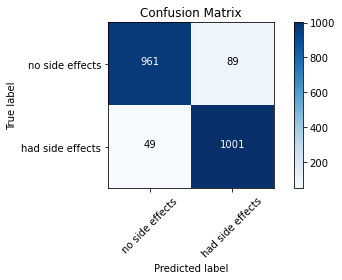

In [62]:
cm_plot_labels = ['no side effects', 'had side effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

# Saving and loading the NN

In [63]:
import os.path
if os.path.isfile('models/tut.h5') is False:
    model.save('models/tut.h5')

In [65]:
from tensorflow.keras.models import load_model

new_model = load_model('models/tut.h5')

In [ ]:
new_model.summary()

# Convuolutional NN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.preprocessing import  MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
os.chdir('dogz')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

for c in random.sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cat')
for c in random.sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/dog')
for c in random.sample(glob.glob('cat*'), 50):
    shutil.move(c, 'test/cat')
for c in random.sample(glob.glob('dog*'), 50):
    shutil.move(c, 'test/dog')


In [3]:
os.chdir('../../')

In [7]:
train_path = 'dogz/train'
valid_path = 'dogz/valid'
test_path = 'dogz/test'

In [8]:
train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
